# Model Notebook

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Dropout, Conv2D, BatchNormalization, Flatten, Dense, MaxPool2D, Input, Activation, Add
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop
import os

In [2]:
fldr = "jangedoo/utkface-new/versions/1/UTKFace"

In [3]:
files = os.listdir(fldr)

In [4]:
ages = []
genders = []
images = []

In [5]:
for f in files:
    age = int(f.split('_')[0])
    ages.append(age)
    gender = int(f.split('_')[1])
    genders.append(gender)
    image = cv2.imread(fldr + '/' + f)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48, 48))
    images.append(image)

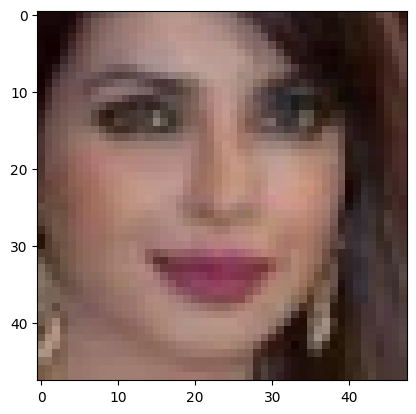

In [6]:
plt.imshow(images[45])

In [7]:
print(ages[45],genders[45])

34 1


In [8]:
images_f  = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [9]:
np.save('numpy arrays/images.npy', images_f)
np.save('numpy arrays/ages.npy', ages_f)
np.save('numpy arrays/genders.npy', genders_f)

In [10]:
gender_values, gender_counts = np.unique(genders_f, return_counts=True)
age_values, age_counts = np.unique(ages_f, return_counts=True)

In [11]:
print(gender_values)

[0 1]


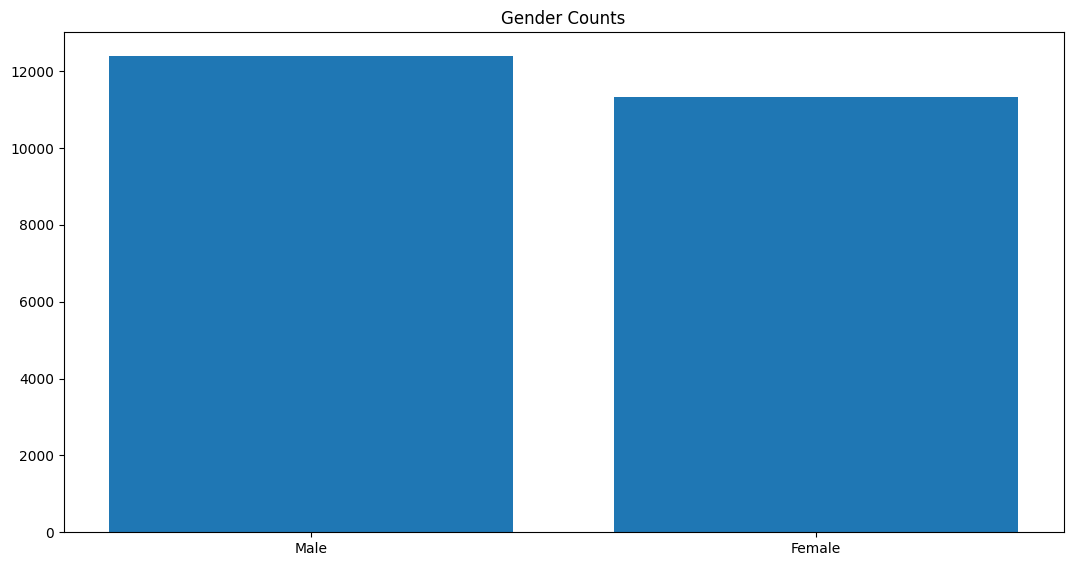

In [12]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
genders = ['Male', 'Female']
ax.bar(genders, gender_counts)
plt.title('Gender Counts')
plt.show()

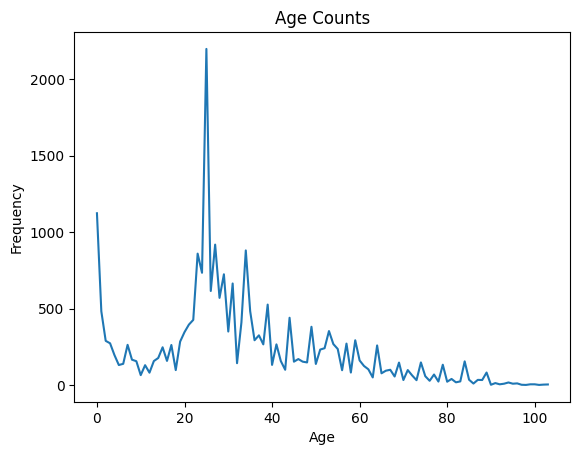

In [13]:
plt.plot(age_counts)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Counts')
plt.show()

In [ ]:
# Defining labels for the model

labels = []
i = 0
while i < len(ages_f):
    label = []
    label.append(ages_f[i])
    label.append(genders_f[i])
    labels.append(label)
    i += 1

In [15]:
labels_f = np.array(labels)

In [ ]:
# Creating another list of images with the pixel values scaled between 0 and 1

images_f_2 = images_f / 255.0
images_f_2.shape

(23708, 48, 48, 3)

In [17]:
from sklearn.model_selection import train_test_split

In [ ]:
# splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(images_f_2, labels_f, test_size=0.25, random_state=42)

In [ ]:
# Splitting the labels into two separate arrays for age and gender

y_train_2 = [y_train[:, 0], y_train[:, 1]]
y_test_2 = [y_test[:, 0], y_test[:, 1]]